### Import libs from packages

In [1]:
import pandas as pd
from med.room.processors.class_principal import CallMethods
from med.room.processors.data_views import DataVisualizer
from med.room.processors.transform_data import NedRoomClean
from med.room.utils import logger

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

### Creating DataFrame

In [3]:
dados = {'indices_id': ['0','1','2','3'],
         'Frase original': ['Olhando para a escala na parede, qual valor indicaria melhor a sua dor hoje?',
                           'Olhando para a escala na parede, qual valor indicaria melhor a sua dor hoje?',
                           'Olhando para a escala na parede, qual valor indicaria melhor a sua dor hoje?',
                           'Olhando para a escala na parede, qual valor indicaria melhor a sua dor hoje?'],
         'Frases comparativas': ['De acordo com a escala de dor ali na parede', 
                                'qual valor você acha que mais representa a sua dor?',
                                'De 0 a 10, qual o nível de intensidade da sua dor atualmente?',
                                'Qual a intensidade da sua dor?'],
         }

In [4]:
dataset = pd.DataFrame(dados)

In [5]:
dataset

,indices_id,Frase original,Frases comparativas
0,0,"Olhando para a escala na parede, qual valor indicaria melhor a sua dor hoje?",De acordo com a escala de dor ali na parede
1,1,"Olhando para a escala na parede, qual valor indicaria melhor a sua dor hoje?",qual valor você acha que mais representa a sua dor?
2,2,"Olhando para a escala na parede, qual valor indicaria melhor a sua dor hoje?","De 0 a 10, qual o nível de intensidade da sua dor atualmente?"
3,3,"Olhando para a escala na parede, qual valor indicaria melhor a sua dor hoje?",Qual a intensidade da sua dor?


In [6]:
dataset.shape

(4, 3)

### Save DataSet in Lake

In [7]:
filename = 'dados_frases'
df = NedRoomClean.save_file(dataset, filename)

[03/12 00:01:01] - [Info]:  save csf file
[03/12 00:01:01] - [Info]:  Finishing Process


### Declare Variables

In [8]:
filename = 'dados_frases'
column_text = ['Frase original', 'Frases comparativas']
additional_stop_words = ['bom', 'dia', 'ola', 'eu']
especifc_word_similar = 'dor'
title_of_plot_first = 'Similar words from text'
list_of_relationship_positive = ["acordo", "melhor"]
list_of_relationship_negative = ['dor', 'intensidade']

#target_sentence = "You'd love to drink a cool refreshing Coke"
target_sentence = ["Olhando para a escala na parede, qual valor indicaria melhor a sua dor hoje?",
                  "De acordo com a escala de dor ali na parede",
                  'qual valor você acha que mais representa a sua dor?',
                                'De 0 a 10, qual o nível de intensidade da sua dor atualmente?',
                                'Qual a intensidade da sua dor?']

### Building Process

In [9]:
dataset, model_similar, matrix_words, dataframe_matrix, model, embeddings_en_2d, print_info, similar, word_clusters, w2v_vocab_result, result = CallMethods.call_processors(filename=filename,
                                                                                column_text=column_text,
                                                                                additional_stop_words=additional_stop_words,
                                                                                especifc_word_similar=especifc_word_similar,
                                                                                list_of_relationship_positive=list_of_relationship_positive,
                                                                                list_of_relationship_negative=list_of_relationship_negative,
                                                                                target_sentence=target_sentence)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f726c372550>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


[03/12 00:01:04] - [Info]:  Start Process to Similary Words
[03/12 00:01:04] - [Info]:  Load DataFrame
[03/12 00:01:04] - [Info]:  load csf file
[03/12 00:01:04] - [Info]:  Finishing Process
[03/12 00:01:04] - [Debug]:  Numbers of columns and Rows (4, 3)
[03/12 00:01:04] - [Debug]:  Columns Name Index(['indices_id', 'Frase original', 'Frases comparativas'], dtype='object')
[03/12 00:01:04] - [Info]:  Start Process to Transform Data
[03/12 00:01:04] - [Debug]:  column created: 
 0    olhando escala parede valor indicaria melhor dor hoje
1    olhando escala parede valor indicaria melhor dor hoje
2    olhando escala parede valor indicaria melhor dor hoje
3    olhando escala parede valor indicaria melhor dor hoje
Name: Frase original_clean, dtype: object
[03/12 00:01:04] - [Debug]:  column created: 
 0        acordo escala dor ali parede
1      valor voce acha representa dor
2    nivel intensidade dor atualmente
3                     intensidade dor
Name: Frases comparativas_clean, dtype: 

### Visualize Results

In [10]:
# dataframe construido
dataset

,indices_id,Frase original,Frases comparativas,Frase original_clean,Frases comparativas_clean,Frase original_token,Frases comparativas_token,concatenado
0,0,"Olhando para a escala na parede, qual valor indicaria melhor a sua dor hoje?",De acordo com a escala de dor ali na parede,olhando escala parede valor indicaria melhor dor hoje,acordo escala dor ali parede,"[olhando, escala, parede, valor, indicaria, melhor, dor, hoje]","[acordo, escala, dor, ali, parede]","[olhando, escala, parede, valor, indicaria, melhor, dor, hoje, acordo, escala, dor, ali, parede]"
1,1,"Olhando para a escala na parede, qual valor indicaria melhor a sua dor hoje?",qual valor você acha que mais representa a sua dor?,olhando escala parede valor indicaria melhor dor hoje,valor voce acha representa dor,"[olhando, escala, parede, valor, indicaria, melhor, dor, hoje]","[valor, voce, acha, representa, dor]","[olhando, escala, parede, valor, indicaria, melhor, dor, hoje, valor, voce, acha, representa, dor]"
2,2,"Olhando para a escala na parede, qual valor indicaria melhor a sua dor hoje?","De 0 a 10, qual o nível de intensidade da sua dor atualmente?",olhando escala parede valor indicaria melhor dor hoje,nivel intensidade dor atualmente,"[olhando, escala, parede, valor, indicaria, melhor, dor, hoje]","[nivel, intensidade, dor, atualmente]","[olhando, escala, parede, valor, indicaria, melhor, dor, hoje, nivel, intensidade, dor, atualmente]"
3,3,"Olhando para a escala na parede, qual valor indicaria melhor a sua dor hoje?",Qual a intensidade da sua dor?,olhando escala parede valor indicaria melhor dor hoje,intensidade dor,"[olhando, escala, parede, valor, indicaria, melhor, dor, hoje]","[intensidade, dor]","[olhando, escala, parede, valor, indicaria, melhor, dor, hoje, intensidade, dor]"


In [11]:
# lista de palavras de todo dataset
matrix_words

['olhando',
 'escala',
 'parede',
 'valor',
 'indicaria',
 'melhor',
 'dor',
 'hoje',
 'acordo',
 'ali',
 'voce',
 'acha',
 'representa',
 'nivel',
 'intensidade',
 'atualmente']

In [12]:
# matrix de score entre todas as palavras cruzadas do dataset
dataframe_matrix

,olhando,escala,parede,valor,indicaria,melhor,dor,hoje,acordo,ali,voce,acha,representa,nivel,intensidade,atualmente
olhando,1.000000,-0.003862,0.107517,0.165745,0.033134,0.082272,0.004556,0.150310,-0.040109,0.045130,-0.050292,0.017079,0.193759,-0.067833,-0.025285,-0.024229
escala,-0.003862,1.000000,-0.211455,0.039800,-0.143231,0.089267,0.066754,0.096328,0.126913,0.048870,0.028307,0.043237,0.033288,0.030926,0.078696,0.098989
parede,0.107517,-0.211455,1.000000,0.062056,0.069369,-0.095934,0.260882,0.029490,0.007889,0.034579,0.038845,0.030337,-0.021021,0.056270,-0.023489,0.044037
valor,0.165745,0.039800,0.062056,1.000000,0.104893,-0.193797,-0.028087,-0.028202,0.082038,-0.130626,-0.034836,-0.002574,0.053398,-0.083934,-0.001454,-0.077038
indicaria,0.033134,-0.143231,0.069369,0.104893,1.000000,0.041525,-0.128785,0.006984,-0.030813,-0.103931,0.124588,-0.066986,0.135401,-0.026029,0.026891,0.004819
melhor,0.082272,0.089267,-0.095934,-0.193797,0.041525,1.000000,0.060009,-0.120930,-0.024742,0.145358,0.052885,-0.042448,0.004466,-0.012639,0.207426,-0.074214
dor,0.004556,0.066754,0.260882,-0.028087,-0.128785,0.060009,1.000000,-0.026510,-0.056638,0.069657,-0.021536,-0.036058,-0.155440,0.042381,-0.009740,-0.082079
hoje,0.150310,0.096328,0.029490,-0.028202,0.006984,-0.120930,-0.026510,1.000000,0.123490,0.093049,-0.108554,0.074553,0.029873,0.176223,-0.005189,0.232396
acordo,-0.040109,0.126913,0.007889,0.082038,-0.030813,-0.024742,-0.056638,0.123490,1.000000,-0.154761,0.076036,0.076677,-0.112255,0.098471,0.065956,-0.089649
ali,0.045130,0.048870,0.034579,-0.130626,-0.103931,0.145358,0.069657,0.093049,-0.154761,1.000000,-0.179803,0.182923,0.026479,0.230844,-0.157520,0.123588


In [13]:
# modelo word2Vec treinado
model

In [14]:
# matrix construida a partir da lista de palavras matrix_words que é todo o contexto do dataset
embeddings_en_2d

array([[[ 2.4171298e+02, -1.9313715e+03],
        [-1.4918347e+02, -1.4460602e+03],
        [ 9.3237274e+02, -1.0389783e+03],
        [ 4.8812496e+01, -2.4001250e+02],
        [-1.9738306e+02,  3.8438129e+02],
        [ 5.4659436e+02,  3.1149094e+02],
        [-1.0563998e+03, -1.4254828e+02],
        [ 2.4189753e+03, -5.0048459e+02],
        [ 1.2444647e+03,  1.3193230e+03],
        [-7.7590839e+02,  2.3899126e+03],
        [ 1.4203164e+03, -1.9817942e+03],
        [-1.7739742e+03,  1.3591802e+03],
        [ 2.0393706e+02,  1.6030546e+03],
        [-2.6157390e+03, -8.9298523e+01],
        [ 2.1388008e+03,  9.3571844e+02]],

       [[ 2.0393706e+02,  1.6030546e+03],
        [ 1.4203164e+03, -1.9817942e+03],
        [ 1.1845801e+03, -7.2441809e+02],
        [-4.8559390e+02,  6.5906616e+02],
        [-1.7739742e+03,  1.3591802e+03],
        [ 1.2894895e+03,  2.2254443e+03],
        [ 9.0479114e+02,  4.8581686e+02],
        [ 2.4189753e+03, -5.0048459e+02],
        [-1.6111205e+03, -2.1676

In [15]:
#relacionamento de palavras positivas e negativas a partir da variavel: 
# list_of_relationship_positive e list_of_relationship_negative
print_info

[('indicaria', 0.061271850019693375),
 ('ali', 0.0426921546459198),
 ('escala', 0.03848633915185928),
 ('olhando', 0.034221164882183075),
 ('atualmente', 0.027250245213508606),
 ('acha', 0.023749714717268944),
 ('hoje', 0.01864088699221611),
 ('representa', 0.0050835274159908295),
 ('voce', -0.03061375580728054),
 ('nivel', -0.039514973759651184)]

In [16]:
# lista de palavras relacionada a variavel especifc_word_similar + score das palavras (pode ser qualquer outra que tenha no vocabulario)
similar

[('parede', 0.26),
 ('ali', 0.07),
 ('escala', 0.07),
 ('melhor', 0.06),
 ('nivel', 0.04),
 ('olhando', 0.0),
 ('intensidade', -0.01),
 ('voce', -0.02),
 ('hoje', -0.03),
 ('valor', -0.03)]

In [17]:
# mapa de palavras similares para construcao do plot grafico
word_clusters

[['representa',
  'valor',
  'hoje',
  'parede',
  'melhor',
  'ali',
  'indicaria',
  'acha',
  'dor',
  'escala',
  'atualmente',
  'intensidade',
  'acordo',
  'voce',
  'nivel'],
 ['acordo',
  'atualmente',
  'hoje',
  'melhor',
  'intensidade',
  'dor',
  'ali',
  'acha',
  'valor',
  'representa',
  'nivel',
  'voce',
  'olhando',
  'indicaria',
  'parede'],
 ['dor',
  'olhando',
  'indicaria',
  'valor',
  'nivel',
  'atualmente',
  'voce',
  'ali',
  'acha',
  'hoje',
  'acordo',
  'representa',
  'intensidade',
  'melhor',
  'escala'],
 ['olhando',
  'indicaria',
  'acordo',
  'parede',
  'representa',
  'escala',
  'intensidade',
  'acha',
  'dor',
  'hoje',
  'voce',
  'atualmente',
  'nivel',
  'ali',
  'melhor'],
 ['representa',
  'voce',
  'valor',
  'parede',
  'melhor',
  'olhando',
  'intensidade',
  'hoje',
  'atualmente',
  'nivel',
  'acordo',
  'acha',
  'ali',
  'dor',
  'escala'],
 ['intensidade',
  'ali',
  'escala',
  'olhando',
  'dor',
  'voce',
  'indicaria'

In [18]:
w2v_vocab_result

['Olhando para a escala na parede, qual valor indicaria melhor a sua dor hoje?',
 'De acordo com a escala de dor ali na parede',
 'qual valor você acha que mais representa a sua dor?',
 'De 0 a 10, qual o nível de intensidade da sua dor atualmente?',
 'Qual a intensidade da sua dor?']

In [19]:
result

[(1.0, 'intensidade'),
 (0.20742583274841309, 'melhor'),
 (0.20671935379505157, 'voce'),
 (0.11607226729393005, 'nivel'),
 (0.07869578152894974, 'escala'),
 (0.065956249833107, 'acordo'),
 (0.03830789402127266, 'representa'),
 (0.026891211047768593, 'indicaria'),
 (0.02663920260965824, 'acha'),
 (-0.0014544962905347347, 'valor'),
 (-0.005188523326069117, 'hoje'),
 (-0.009740282781422138, 'dor'),
 (-0.023489121347665787, 'parede'),
 (-0.02528487518429756, 'olhando'),
 (-0.13186503946781158, 'atualmente'),
 (-0.15751996636390686, 'ali')]

### Plot Graph Views

### plot de mapa de palavras e suas similariedades

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

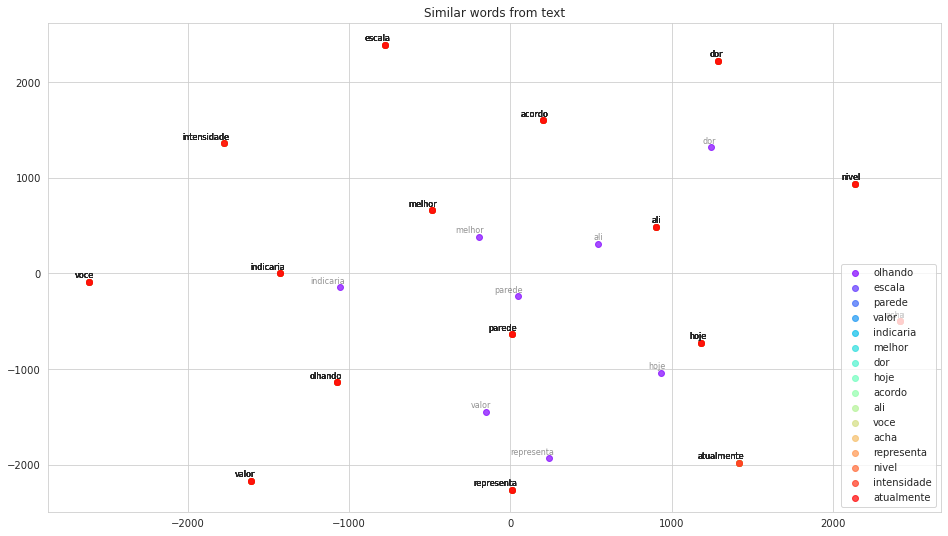

In [20]:
DataVisualizer.tsne_plot_similar_words(title_of_plot_first, matrix_words, embeddings_en_2d, word_clusters, 0.7, 'similar_words.png')

### Mapa de palavras e seu grau de relacionamento

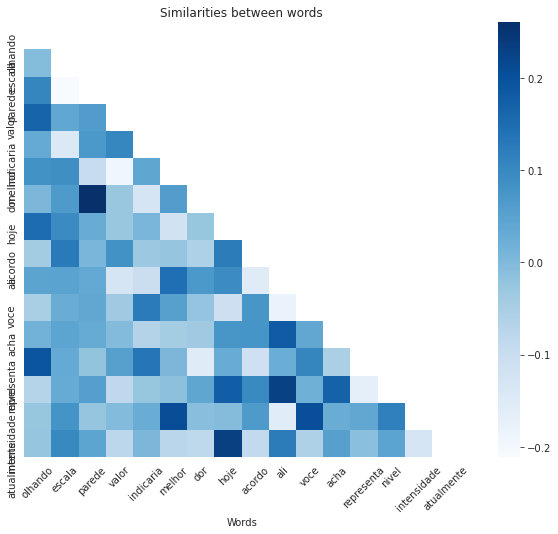

In [21]:
DataVisualizer.plo_similar_between_words(dataframe_matrix)

### Mapa dimensional de palavras similares

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f726c372550>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
/opt/med_room/med/room/processors/data_views.py:100: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the

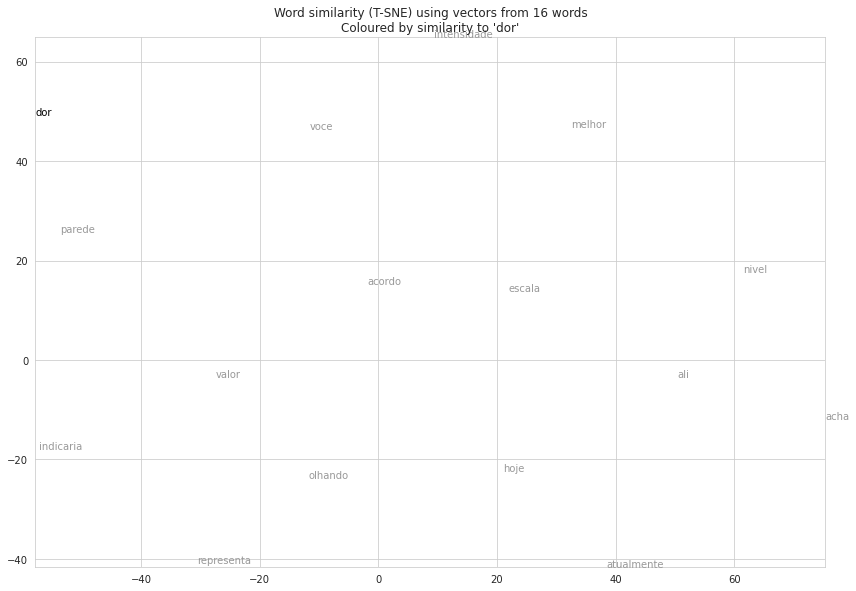

In [22]:
DataVisualizer.dimensional_vector_words(model, matrix_words, especifc_word_similar)